In [1]:
import tensorflow as tf

import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

To create an input pipeline, you must start with a data source. For example, to construct a Dataset from data in memory, you can use tf.data.Dataset.from_tensors() or tf.data.Dataset.from_tensor_slices(). Alternatively, if your input data is stored in a file in the recommended TFRecord format, you can use tf.data.TFRecordDataset().

    | Note:
from_tensors produces a dataset containing only a single element. To slice the input tensor into multiple elements, use from_tensor_slices instead.

In [2]:
data=[8, 3, 0, 8, 2, 1]
dataset = tf.data.Dataset.from_tensor_slices(data)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [3]:
for elem in dataset:
  print(elem.numpy())

8
3
0
8
2
1


In [4]:
it = iter(dataset)

print(next(it).numpy())

8


    | The reduce transformation to compute the sum of a dataset of integers.

In [5]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

22


    | Dataset.element_spec
 The Dataset.element_spec property allows you to inspect the type of each element component. The property returns a nested structure of tf.TypeSpec objects, matching the structure of the element, which may be a single component, a tuple of components, or a nested tuple of components. For example:   

In [6]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([40,56,70]))

print(dataset1.element_spec)

TensorSpec(shape=(56, 70), dtype=tf.float32, name=None)


In [7]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=10, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [8]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(56, 70), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [9]:
# Dataset containing a sparse tensor.
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4]))

dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [10]:
# Use value_type to see the type of value represented by the element spec
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

    | Note: 
The Dataset transformations support datasets of any structure. When using the Dataset.map, and Dataset.filter transformations, which apply a function to each element, the element structure determines the arguments of the function:

In [11]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 15], minval=0, maxval=10, dtype=tf.int32))

dataset1

<TensorSliceDataset element_spec=TensorSpec(shape=(15,), dtype=tf.int32, name=None)>

In [12]:
for z in dataset1:
  print(z.numpy())

[9 6 1 0 2 8 1 9 7 5 7 0 7 2 0]
[4 5 4 8 3 8 0 2 3 8 8 8 3 3 9]
[8 4 1 4 9 9 5 4 0 8 2 6 1 1 7]
[7 4 6 6 7 8 3 7 2 4 6 4 9 6 1]


In [13]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([5]),
    tf.random.uniform([5, 10], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None))>

In [14]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3

<ZipDataset element_spec=(TensorSpec(shape=(15,), dtype=tf.int32, name=None), (TensorSpec(shape=(), dtype=tf.float32, name=None), TensorSpec(shape=(10,), dtype=tf.int32, name=None)))>

In [15]:
for a, (b,c) in dataset3:
  print('shapes: {a.shape}, {b.shape}, {c.shape}'.format(a=a, b=b, c=c))

shapes: (15,), (), (10,)
shapes: (15,), (), (10,)
shapes: (15,), (), (10,)
shapes: (15,), (), (10,)


In [16]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [17]:
train, test

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [18]:
images, labels = train
images = images/255

In [19]:
labels, images

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0.,

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [21]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [22]:
count(5)

<generator object count at 0x000002260AE26490>

In [23]:
for n in count(5):
  print(n)

0
1
2
3
4


    | Consuming CSV data
Refer to the Loading CSV Files and Loading Pandas DataFrames tutorials for more examples.

In [24]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [25]:
df = pd.read_csv(titanic_file)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [26]:
df.shape

(627, 10)

In [27]:
df.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [28]:
df.sample(5)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
320,0,male,20.0,0,0,9.500,Third,unknown,Southampton,y
400,0,male,28.0,0,0,227.525,First,unknown,Cherbourg,y
58,0,male,25.0,0,0,7.650,Third,F,Southampton,y
130,0,male,30.0,0,0,13.000,Second,unknown,Southampton,y
217,0,male,19.0,0,0,0.000,Third,unknown,Southampton,y


In [29]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))
titanic_slices

<TensorSliceDataset element_spec={'survived': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sex': TensorSpec(shape=(), dtype=tf.string, name=None), 'age': TensorSpec(shape=(), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [30]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(2):
  for key, value in feature_batch.items():
    print("   {!r:20s} : {}".format(key, value)) # {!r:20s} --> specifier
  print('\n')

   'survived'           : 0
   'sex'                : b'male'
   'age'                : 22.0
   'n_siblings_spouses' : 1
   'parch'              : 0
   'fare'               : 7.25
   'class'              : b'Third'
   'deck'               : b'unknown'
   'embark_town'        : b'Southampton'
   'alone'              : b'n'


   'survived'           : 1
   'sex'                : b'female'
   'age'                : 38.0
   'n_siblings_spouses' : 1
   'parch'              : 0
   'fare'               : 71.2833
   'class'              : b'First'
   'deck'               : b'C'
   'embark_town'        : b'Cherbourg'
   'alone'              : b'n'




    | Note:
The tf.data.experimental.make_csv_dataset function is the high-level interface for reading sets of CSV files. It supports column type inference and many other features, like batching and shuffling, to make usage simple.

In [31]:
titanic_batches = tf.data.experimental.make_csv_dataset(

                                                        titanic_file, 
                                                        batch_size=4,
                                                        label_name="survived"
                                                         
                                                         )

In [32]:
titanic_batches

<PrefetchDataset element_spec=(OrderedDict([('sex', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('age', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('n_siblings_spouses', TensorSpec(shape=(4,), dtype=tf.int32, name=None)), ('parch', TensorSpec(shape=(4,), dtype=tf.int32, name=None)), ('fare', TensorSpec(shape=(4,), dtype=tf.float32, name=None)), ('class', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('deck', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('embark_town', TensorSpec(shape=(4,), dtype=tf.string, name=None)), ('alone', TensorSpec(shape=(4,), dtype=tf.string, name=None))]), TensorSpec(shape=(4,), dtype=tf.int32, name=None))>

In [33]:
for feature_batch, label_batch in titanic_batches.take(2):
  print("'survived': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))
  print('\n')

'survived': [0 1 0 1]
features:
  'sex'               : [b'female' b'female' b'male' b'female']
  'age'               : [28. 33. 28. 49.]
  'n_siblings_spouses': [0 1 0 0]
  'parch'             : [0 2 0 0]
  'fare'              : [ 7.8958 27.75    8.05   25.9292]
  'class'             : [b'Third' b'Second' b'Third' b'First']
  'deck'              : [b'unknown' b'unknown' b'unknown' b'D']
  'embark_town'       : [b'Southampton' b'Southampton' b'Southampton' b'Southampton']
  'alone'             : [b'y' b'n' b'y' b'y']


'survived': [0 1 1 1]
features:
  'sex'               : [b'female' b'male' b'female' b'female']
  'age'               : [38. 49. 40. 40.]
  'n_siblings_spouses': [0 1 1 0]
  'parch'             : [0 0 1 0]
  'fare'              : [ 13.      89.1042 134.5    153.4625]
  'class'             : [b'Second' b'First' b'First' b'First']
  'deck'              : [b'unknown' b'C' b'E' b'C']
  'embark_town'       : [b'Southampton' b'Cherbourg' b'Cherbourg' b'Southampton']
  'alone' 

    | We can use the select_columns argument if you only need a subset of columns.

In [34]:
df.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [35]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived", select_columns=['sex','class', 'fare', 'survived','age'])

In [36]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [1 0 0 1]
  'sex'               : [b'female' b'male' b'male' b'female']
  'age'               : [23. 23. 19. 28.]
  'fare'              : [263.      15.0458   7.65     7.75  ]
  'class'             : [b'First' b'Second' b'Third' b'Third']


    |Note:
There is also a lower-level experimental.CsvDataset class which provides finer grained control. It does not support column type inference. Instead you must specify the type of each column.

In [37]:
titanic_types  = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types , header=True)

for line in dataset.take(5):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']


In [38]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
    
    )
flowers_root = pathlib.Path(flowers_root)

In [39]:
flowers_root

WindowsPath('C:/Users/Laptop Point/.keras/datasets/flower_photos')

In [40]:
for item in flowers_root.glob("*"): # Iterate over this subtree and yield all existing files (of any kind, including directories) matching the given relative pattern.
 
  print(item.name)

daisy
dandelion
LICENSE.txt
roses
sunflowers
tulips


In [41]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))  # Note: The default behavior of this method is to return filenames in a non-deterministic random shuffled order. Pass a seed or shuffle=False to get results in a deterministic order.

for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\Laptop Point\\.keras\\datasets\\flower_photos\\sunflowers\\18828277053_1493158b28.jpg'
b'C:\\Users\\Laptop Point\\.keras\\datasets\\flower_photos\\tulips\\8689672277_b289909f97_n.jpg'
b'C:\\Users\\Laptop Point\\.keras\\datasets\\flower_photos\\tulips\\490541142_c37e2b4191_n.jpg'
b'C:\\Users\\Laptop Point\\.keras\\datasets\\flower_photos\\dandelion\\5109496141_8dcf673d43_n.jpg'
b'C:\\Users\\Laptop Point\\.keras\\datasets\\flower_photos\\dandelion\\16242239484_51286673af.jpg'


    | Read the data using the tf.io.read_file function and extract the label from the path, returning (image, label) pairs:



In [42]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [43]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00'

b'daisy'


    | Batching dataset elements

While tf.data tries to propagate shape information, the default settings of Dataset.batch result in an unknown batch size because the last batch may not be full. Note the Nones in the shape:

In [44]:
inc_dataset = tf.data.Dataset.range(10)
dec_dataset = tf.data.Dataset.range(0, -10, -1)

dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4,drop_remainder=True)

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]


    |Note:
Use the drop_remainder argument to ignore that last batch, and get full shape propagation:



    | Batching tensors with padding

In [45]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None,))

for batch in dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



    | Training workflows

Processing multiple epochs

The tf.data API offers two main ways to process multiple epochs of the same data.

The simplest way to iterate over a dataset in multiple epochs is to use the Dataset.repeat() transformation. First, create a dataset of titanic data:

In [46]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [47]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

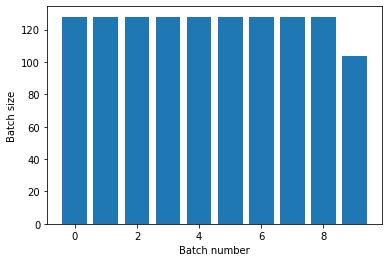

In [48]:
titanic_batches = titanic_lines.repeat(2).batch(128)
plot_batch_sizes(titanic_batches)

    | Note:
If you need clear epoch separation, put Dataset.batch before the repeat:

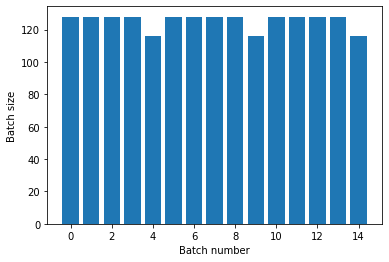

In [49]:
titanic_batches = titanic_lines.batch(128).repeat(3)

plot_batch_sizes(titanic_batches)

    | Note:

If you would like to perform a custom computation (for example, to collect statistics) at the end of each epoch then it's simplest to restart the dataset iteration on each epoch:

In [50]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print("End of epoch: ", epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


    | Randomly shuffling input data
    
The Dataset.shuffle() transformation maintains a fixed-size buffer and chooses the next element uniformly at random from that buffer.




# Time series windowing

In [51]:
range_ds = tf.data.Dataset.range(100000)
range_ds


<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [53]:
# Using batch
batches = range_ds.batch(15, drop_remainder=True)

for batch in batches.take(10):
  print(batch.numpy())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
[45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]
[75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
[105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]
[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
